<a href="https://colab.research.google.com/github/Xketh/Fatec_PLN/blob/main/Aula_12_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivo**

* Criar um programa que consegue adivinhar a próxima palavra de uma frase usando um tipo especial de cérebro de computador chamado Rede Neural Recorrente (RNN).

* Criar outro programa que consegue dizer se uma frase é feliz ou triste (sentimento positivo ou negativo) usando uma versão mais esperta dessa rede, chamada LSTM.

Para fazer isso, vamos usar ferramentas chamadas TensorFlow e Keras, que ajudam a construir e ensinar essas redes de computador.


### **Explicação dos termos:**

* **Rede Neural Recorrente (RNN):**
É um tipo de cérebro de computador que entende sequências, como frases. Ele lembra as palavras que vieram antes para ajudar a escolher a próxima palavra certa.

* **TensorFlow/Keras:** São programas que ajudam a criar e ensinar essas redes neurais de forma mais fácil, como kits de ferramentas para construir máquinas inteligentes.

* **Rede Long Short-Term Memory (LSTM):** É uma versão mais esperta da RNN que consegue lembrar melhor coisas importantes por mais tempo, assim entende frases e sentimentos com mais precisão.

## **1. Etapas de Desenvolvimento (Fluxo do Programa):**

# **Implementação: RNN Simples para Previsão da Próxima Palavra**

1. **Preparar os dados:** Reunir um conjunto de textos e organizá-los de forma adequada para ensinar a rede neural.

2. **Criar o modelo RNN:**
Planejar e construir o formato básico do cérebro artificial que será usado.

3. **Ensinar/Treinar o modelo:** Usar os textos organizados para treinar a rede neural, mostrando como ela deve funcionar.

4. **Avaliação de desempenho:** Testar o que a rede aprendeu e verificar se está boa para prever a próxima palavra corretamente.

5. **Testar o modelo:** Dar frases diferentes ao modelo para ver como ele se sai na previsão de palavras.


# **Implementação: LSTMs para Classificação de Sentimentos**

1. **Preparar os dados:** Reunir frases já classificadas como "positivas" ou "negativas" e prepará-las (limpar e organizar) para serem usadas no treinamento.

2. **Criar o modelo LSTM:** Desenhar a estrutura do modelo LSTM, especificando como ele vai processar as frases para identificar os sentimentos.

3. **Ensinar/Treinar o modelo:** Ensinar o modelo LSTM a reconhecer padrões nos sentimentos das frases usando os dados preparados.

4. **Avaliação de desempenho:** Medir o quão bem o modelo consegue identificar sentimentos corretamente com base nos dados usados no treinamento.

5. **Teste do Modelo:** Colocar o modelo à prova usando frases novas, que ele ainda não viu, para verificar se consegue classificar os sentimentos com precisão.


# **Implementação 1: Modelo de Rede Neural de Recorrência**

## **1° Passo: Configuração de Ambiente no Google Colab**

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


### **Resumo do que o código está executando:**

---

O código está preparando um programa para trabalhar com texto e redes neurais, sendo assim o programa começa importando tudo isso para criar algo que entende e analisa melhor as frases.


* **numpy:** Uma ferramenta que ajuda o computador a fazer cálculos com números rapidamente.

* **tensorflow.keras:** Um conjunto de ferramentas que facilita criar e ensinar "cérebros" artificiais (modelos de deep learning > sistemas de computador que aprendem a resolver problemas complexos, como reconhecer imagens ou entender texto, imitando o funcionamento do cérebro humano.).

* **Embedding:** Transforma palavras em números que fazem sentido para o computador.

* **SimpleRNN:** É como um "cérebro" simples que entende sequências, como frases.

* **Dense:** Uma parte do "cérebro" que ajuda a tomar decisões.

* **Tokenizer:** Uma ferramenta que traduz texto em números, como se fosse um tradutor de palavras para códigos.

* **pad_sequences:** Garante que todas as frases tenham o mesmo tamanho, adicionando zeros no final se necessário.

## **2° Passo: Preparação do Conjunto de Dados**

In [2]:
# Conjunto de dados de treinamento (pequeno e simplificado)

textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programar é divertido com python",
    "aprenda python e seja feliz",
    "gosto de aprender coisas novas"
]
print(f"Textos de treinamento: {textos_treinamento}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [3]:
# Inicializar o Tokenizer
tokenizer = Tokenizer()

# Construir o vocabulário a partir dos textos
tokenizer.fit_on_texts(textos_treinamento)

# Converter textos em sequências de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)

# Imprimir o vocabulário e as sequências geradas
print(f"\nVocabulário (palavra:índice): {tokenizer.word_index}")
print(f"Sequencias numéricas dos textos: {sequencias}")

# Calcular o tamanho do vocabulário (+1 para incluir o 0 de padding)

total_palavras = len(tokenizer.word_index) + 1
print(f"Tamanho total do vocabulário: {total_palavras}")


Vocabulário (palavra:índice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'é': 5, 'eu': 6, 'em': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'divertido': 11, 'com': 12, 'aprenda': 13, 'e': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequencias numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 5, 11, 12, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20


In [4]:
# Preparar Entradas (X) e saídas (y) para a previsão da próxima palavra
# a entrada (X) será uma sequência de palavras, e a saída (y) será a palavra seguinte
# Determninar o comprimento máximo das sequências para padding

max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

# Criar pares de entrada (sequencia parcial) e saída (próxima palavra)
# Ex: "eu gosto de programar" -> "em"
#  "eu gosto de programar em" -> "python"

entradas_X = []
saidas_y = []

for seq in sequencias:
  for i in range(1, len(seq)):
    entradas_X.append(seq[:i]) # A sequencia até a palavra atual
    saidas_y.append(seq[i])    # a proxima palavra

print(f"Exemplo de entradas_x (parcial): {entradas_X[0:5]}")
print(f"Exemplo de entradas_y (parcial): {saidas_y[0:5]}")

# Padronizar o comprimento das sequências de entrada
# Todas as sequências de entrada precisam ter o mesmo comprimento para RNN
entradas_X_padded = pad_sequences(entradas_X, maxlen=max_comprimento -1, padding='pre')
# O maxlen é 'max_comprimento -1 ' porque a saída 'y' é a ultima palavra, então x sempre terá 1 palavra a menos.

# Converter as saídas para o formato one-hot encoding
# Isso é necessário para a camada de saída da RNN(softmax)
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_x_padded (após padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"\nExemplo de saidas_y_one_hot (após one-hot encoding): \n{saidas_y_one_hot[0:5]}")
print(f"\nFormato final das entradas (X): {entradas_X_padded.shape}")
print(f"\nExemplo final das saídas (y): {saidas_y_one_hot.shape}")


Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_x (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de entradas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_x_padded (após padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]

Exemplo de saidas_y_one_hot (após one-hot encoding): 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Formato final das entradas (X): (21, 5)

Exemplo final das saídas (y): (21, 20)


### **Resumo do que o código está executando:**

---

* **Transformamos frases em pares:** uma parte da frase já conhecida e a palavra que vem em seguida.

* **Usamos o pad_sequences:** que adiciona zeros no início das frases menores para que fiquem do mesmo tamanho.

* **Usamos to_categorical:** que cria um código especial onde só a posição da palavra certa é marcada com "1", e o resto fica "0".

## **3° Passo: Construção do Modelo RNN**

In [5]:
# Definindo o modelo
# Definir a arquitetura do modelo RNN
modelo_rnn = Sequential()

# Camada de Embedding:
# total_palavras: tamanho vocabulario
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_lenght: comprimento das sequencias de entrada (maxlen - 1)
modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))

# Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho do estado oculto.
modelo_rnn.add(SimpleRNN(32))

# Camada Densa de Saída:
# total_palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation='softmax': função de ativação para probabilidade (soma 1 para todas as palavras)
modelo_rnn.add(Dense(total_palavras, activation='softmax'))

# Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_rnn.summary()





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### **Resumo do que o código está executando:**

---

* **Camada de Embedding:** Transforma cada palavra em números especiais que mostram o significado dela, para o computador entender melhor as relações entre palavras parecidas.

* **Camada SimpleRNN:** Lê as palavras uma por uma e lembra do que já viu, como uma memória que ajuda a entender a frase toda.

* **Camada Dense (final):** Usa a memória da etapa anterior para decidir qual palavra pode vir a seguir, dando uma "pontuação" para cada palavra possível, que soma 100%.  Ela recebe o vetor do estado oculto final da RNN. Esse vetor resume as informações que a RNN "lembrou" da sequência de palavras processada.

## **4° Passo: Treinamento do Modelo**

In [6]:
# Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn.fit(entradas_X_padded, saidas_y_one_hot, epochs=100, verbose=1)
  # epochs: quandas vezes o modelo verá todo o conjunto de dados
  # verbose: 1 para mostrar o progresso do treinamento
print("Treinamento concluído!")


Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0476 - loss: 2.9956
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0476 - loss: 2.9877
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0476 - loss: 2.9798
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 2.9717
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0476 - loss: 2.9636
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1429 - loss: 2.9553
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1429 - loss: 2.9469
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1429 - loss: 2.9382
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1905 - loss: 2.9294
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1905 - loss: 2.9203
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2381 - loss: 2.9109
Epoch 12/100
1/1 ━━━━━━━━━━━━━

### **Resumo do que o código está executando:**

---
O código informa que vai começar a treinar um modelo chamado RNN, que vai aprender usando dados de entrada e saída várias vezes.

* **epochs=100:** O modelo repete esse aprendizado 100 vezes

* **verbose=1:** Mostra na tela como está indo o treinamento.

Quando o aprendizado termina, aparece a mensagem "Treinamento concluído!".

## **5° Passo: Usar o modelo para Previsão**

In [7]:
# 1. Função de Previsão:

def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):

    """
    Prevê a proxima palavra dado um texto base.
    """

    # Converter o texto base para a sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

    # Padronizar o comprimento da sequênca de entrada(precisa ter o mesmo formato que o treinamento)
    # Atenção: max_seq_len deve ser o comprimento que as *entradas* foram pad_sequenciadas
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')

    # Fazer a previsão
    previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

    # Obter o índice da palavra com a maior probabilidade
    indice_palavra_prevista = np.argmax(previsao_probabilidades)

    # Converter o índice de volta para a palavra
    for palavra, indice in tokenizer.word_index.items():
      if indice == indice_palavra_prevista:
        return palavra
    return None # Caso a palavra não seja encontrada (improvável com o vocabulário ajustado)

# Comprimento de entrada esperado pelo modelo
# entradas_X_padded.shape[1] é o maxlen que usamos no pad_sequences para x
comprimento_entrada_modelo = entradas_X_padded.shape[1]

# Testar o modelo com novas frases
print("\n--- Testando com Modelo RNN ---")

texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: '{proxima_1}'")

texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

# Exemplo com palavra fora do vocabulário ou sequecia que o modelo nunca viu antes
texto_teste_5 = "o sol brilha no" # Palavras "sol" e "brilha" não estão no vocabulário
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}'")



--- Testando com Modelo RNN ---
Texto: 'eu gosto de' -> Próxima palavra prevista: 'programar'
Texto: 'python é uma' -> Próxima palavra prevista: 'linguagem'
Texto: 'programar é divertido' -> Próxima palavra prevista: 'com'
Texto: 'aprenda python e' -> Próxima palavra prevista: 'seja'
Texto: 'o sol brilha no' -> Próxima palavra prevista: 'de'


# **Implementação 2: Modelo de Rede Neural Rede Long Short-Term Memory**

## **1° Passo: Configuração de Ambiente no Google Colab**

In [8]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### **Resumo do que o código está executando:**

---
Importando a biblioteca

## **2° Passo: Preparação do Conjunto de Dados e Análise de sentimentos**

In [9]:
# Definir o conjunto de dados (Frases e Rótulos) para análise de sentimentos

dados_sentimento = [
    ("este filme é ótimo e divertido", "positivo"),
    ("eu adorei o livro, muito bom", "positivo"),
    ("gostei muito da atuação dos atores", "positivo"),
    ("o roteiro é fraco e chato", "negativo"),
    ("não recomendo esse pessimo produto", "negativo"),
    ("uma perda de tempo horrível", "negativo"),
    ("ótimo trabalho, parabéns", "positivo"),
    ("terrível experiência, nunca mais", "negativo"),
    ("excelente serviço, muito eficiente", "positivo"),
    ("que decepção, muito ruim", "negativo"),
    ("aprendizagem de máquina é fascinante", "positivo"),
    ("pln é um campo interessante", "positivo"),
    ("este software travou varias vezes", "negativo"),
    ("a interface é confusa e difícil", "negativo"),
    ("o aplicativo é super útil e rápido", "positivo"),
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos[:3]}")

Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'eu adorei o livro, muito bom', 'gostei muito da atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']


In [10]:
# mapear sentimentos para números: converter "positivo" e "negativo" para 0 e 1
mapeamento_sentimento = {'negativo': 0, 'positivo': 1}
rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])

print(f"\nSentimentos mapeados para números: {rotulos_numericos}")


Sentimentos mapeados para números: [1 1 1 0 0 0 1 0 1 0 1 1 0 0 1]


In [11]:
# Tokenização de Texto
tokenizar = Tokenizer(num_words=None, oov_token="<unk>")
  # num_words=None para pegar todo o vocabulário
  # oov_token para palavras desconhecidas
tokenizer.fit_on_texts(textos)
sequencias_numericas = tokenizer.texts_to_sequences(textos)

total_palavras_vocab = len(tokenizer.word_index) + 1 # +1 para o 0 de padding/OOV

print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"\nSequencias numéricas das frases: {sequencias_numericas}")
print(f"\nTamanho total do vocabulário: {total_palavras_vocab}")

# Padronizar o comprimento das sequências
# Encontrar o comprimento da frase mais longa para padronizar
max_len = max(len(s) for s in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")

sequencias_padded = pad_sequences(sequencias_numericas, maxlen=max_len, padding='post')  # 'post' para adicionar zero no final
print(f"Sequencias após padding: \n{sequencias_padded}")

# Dividir os dados em conjunto de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    sequencias_padded, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)

print(f"\nShape de X_treino: {X_treino.shape}")
print(f"\nShape de X_teste: {X_teste.shape}")
print(f"\nShape de y_treino: {y_treino.shape}")
print(f"\nShape de X_teste: {y_teste.shape}")



Vocabulário (palavra: índice): {'é': 1, 'e': 2, 'de': 3, 'python': 4, 'muito': 5, 'o': 6, 'eu': 7, 'gosto': 8, 'programar': 9, 'uma': 10, 'divertido': 11, 'este': 12, 'ótimo': 13, 'em': 14, 'linguagem': 15, 'poderosa': 16, 'com': 17, 'aprenda': 18, 'seja': 19, 'feliz': 20, 'aprender': 21, 'coisas': 22, 'novas': 23, 'filme': 24, 'adorei': 25, 'livro': 26, 'bom': 27, 'gostei': 28, 'da': 29, 'atuação': 30, 'dos': 31, 'atores': 32, 'roteiro': 33, 'fraco': 34, 'chato': 35, 'não': 36, 'recomendo': 37, 'esse': 38, 'pessimo': 39, 'produto': 40, 'perda': 41, 'tempo': 42, 'horrível': 43, 'trabalho': 44, 'parabéns': 45, 'terrível': 46, 'experiência': 47, 'nunca': 48, 'mais': 49, 'excelente': 50, 'serviço': 51, 'eficiente': 52, 'que': 53, 'decepção': 54, 'ruim': 55, 'aprendizagem': 56, 'máquina': 57, 'fascinante': 58, 'pln': 59, 'um': 60, 'campo': 61, 'interessante': 62, 'software': 63, 'travou': 64, 'varias': 65, 'vezes': 66, 'a': 67, 'interface': 68, 'confusa': 69, 'difícil': 70, 'aplicativo': 

## **3° Passo: Construção do Modelo LSTM**

In [12]:
# Definir a arquitetura do modelo LSTM

modelo_lstm = Sequential()

# Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequencias (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

# Camada LSTM:
# 64: número de unidades (neuronios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropou: Um tipo de regularização para evitar overfitting (descarta aleatoriamente neuronios durante o treinamento)
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Camada Densa de Saída:
# 1: Um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': Função de ativação para classificação binária (produz um valor entre 0 e 1).

modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## **4° Passo: Treinamento e Avaliação do Modelo**

In [13]:
# Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")

historico = modelo_lstm.fit(
    X_treino, y_treino,
    epochs=50,
    batch_size=2,
    validation_split=0.1,
    verbose=1
)

  # epochs: número de vezes que o modelo verá todo o conjunto de dados de treinamento
  # batch_size: número de amostras por atualização de gradiente.
  # validation_split: % dos dados de treino usados para validação durante o treinamento( opcional, mas bom para monitorar o overfitting).
print("Treinamento concluído!")


Iniciando o treinamento do modelo LSTM...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.3306 - loss: 0.6969 - val_accuracy: 0.0000e+00 - val_loss: 0.6956
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8306 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7389 - loss: 0.6883 - val_accuracy: 0.0000e+00 - val_loss: 0.6973
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7931 - loss: 0.6841 - val_accuracy: 0.0000e+00 - val_loss: 0.6998
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.6816 - val_accuracy: 0.0000e+00 - val_loss: 0.7034
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.6607 - val_accuracy: 0.0000e+00 - val_loss: 0.7091
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6462 - val_accuracy: 0.0000e+00 - val_loss: 0.7219
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accura


Acurácia do modelo no conjunto de teste: 66.67%
Perda do modelo no conjunto de teste: 1.4205
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step

 --- Relatório de Classificação ---


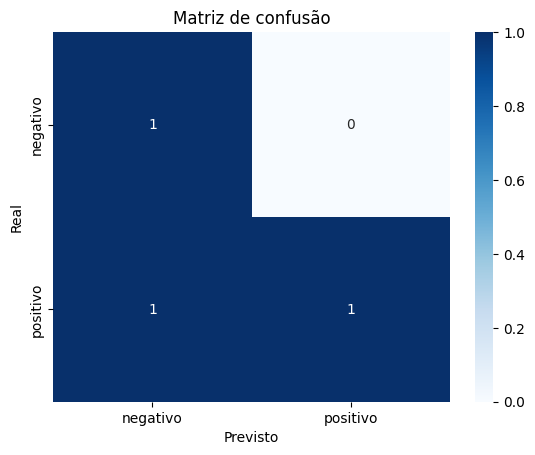

In [14]:
# Avalia o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
print(f"\nAcurácia do modelo no conjunto de teste: {acuracia*100:.2f}%")
print(f"Perda do modelo no conjunto de teste: {perda:.4f}")

# Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(X_teste)
y_pred_classes = (y_pred_prob > 0.5).astype(int) # Converter probabilidades para 0 ou 1

print("\n --- Relatório de Classificação ---")
cm = confusion_matrix(y_teste, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()


## **5° Passo: Testando o modelo com novas frases**

In [16]:
# Utilizando o modelo treinado

def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
  """
  Prevê o sentimento de uma nova frase.

  """

  # Converter a frase para sequencia numerica
  sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

  # Se a frase tem palavras desconhecidas, o tokenizer pode retornar uma lista vazia ou valores 0
  if not sequencia_numerica:
    print(f"Aviso: A frase '{frase_nova}' contém apenas palavras desconhecidas.")
    return "Desconhecido" # ou outra indicação

  sequencia_numerica = sequencia_numerica[0] # Pega a primeira (e única) sequência

  # Padronizar o comprimento da sequência de entrada
  sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='post')

  # Fazer a previsão (probabilidade)
  probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

  # Inverter o mapeamento para obter o nome do sentimento
  mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

  # Classificar com base no limiar de 0.5

  if probabilidade_positiva >= 0.5:
    return mapeamento_inverso[1] # 'positivo'
  else:
    return mapeamento_inverso[0] # 'negativo'

# Testar o modelo com novas frases

print("\n --- Testando o Modelo LSTM com novas Frases ---")

frase_nova_1 = "gostei muito do filme, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_1, mapeamento_sentimento)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "odiei o livro, muito entediante"
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_2, mapeamento_sentimento)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_3 = "a aula de pln é ótima!"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_3, mapeamento_sentimento)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "o atendimento foi péssimo"
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_4, mapeamento_sentimento)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_5, mapeamento_sentimento)
print(f"Frase: '{frase_nova_5}' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "o filme é legal"
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_6, mapeamento_sentimento)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: '{sentimento_6}'")

frase_nova_7 = "isso é horrível, que tristeza"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_7, mapeamento_sentimento)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")



 --- Testando o Modelo LSTM com novas Frases ---
Frase: 'gostei muito do filme, excelente!' -> Sentimento previsto: 'positivo'
Frase: 'odiei o livro, muito entediante' -> Sentimento previsto: 'positivo'
Frase: 'a aula de pln é ótima!' -> Sentimento previsto: 'positivo'
Frase: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase: 'esse produto não vale a pena, é caro' -> Sentimento previsto: 'negativo'
Frase: 'o filme é legal' -> Sentimento previsto: 'negativo'
Frase: 'isso é horrível, que tristeza' -> Sentimento previsto: 'negativo'
